<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is practice of writing algorithms which can discover patterns is visual data. Such as the camera of self-driving car recognizing the car in front

## Get the data

The images we're working with are from the Food101 dataset(kaggle) it only uses two classes (pizza & steak)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-09-15 11:07:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   144MB/s    in 0.7s    

2025-09-15 11:07:41 (144 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

#list number of files on pizza_steak
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class_names from the subdirectory
#"*" pattern'i "her şey" anlamına gelir, yani o dizindeki tüm içeriği getirir
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #ana dizin yolu ve class adi
  #Setup the target directory
  target_folder = target_dir + target_class #bu ikisiin birlestirir
  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1) #os.listdir(target_folder): Klasördeki tüm dosyaları listeler

  #Read in the image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0]) #listeden ilk ve tek elemani alir daha sonra tam dosya yolunu olusturur = "pizza_steak/test/pizza/pizza_001.jpg" mesela
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img

Image shape: (384, 512, 3)


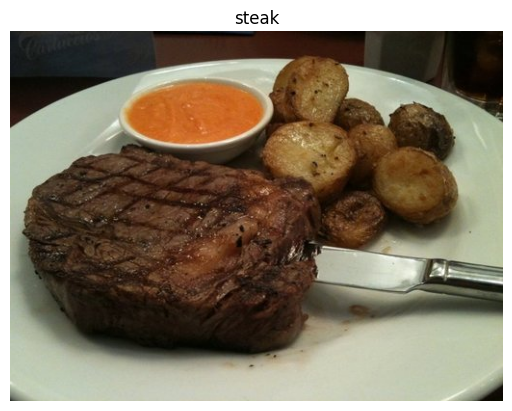

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 30,  34,  33],
        [ 30,  34,  33],
        [ 29,  33,  32],
        ...,
        [ 22,  14,   3],
        [ 23,  15,   2],
        [ 23,  15,   2]],

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [ 21,  13,   2],
        [ 22,  14,   1],
        [ 20,  12,   0]],

       [[ 24,  28,  29],
        [ 24,  28,  29],
        [ 25,  29,  30],
        ...,
        [ 25,  17,   6],
        [ 25,  17,   6],
        [ 22,  14,   3]],

       ...,

       [[ 77,  83,  73],
        [ 85,  91,  81],
        [ 95, 101,  91],
        ...,
        [ 12,  12,   2],
        [ 11,  11,   1],
        [ 10,  10,   0]],

       [[ 61,  66,  59],
        [ 69,  74,  67],
        [ 81,  87,  77],
        ...,
        [ 12,  14,   1],
        [ 11,  13,   0],
        [  9,  11,   0]],

       [[ 46,  51,  44],
        [ 54,  59,  52],
        [ 67,  73,  63],
        ...,
        [ 11,  13,   

In [ ]:
img.shape #width height colour channels

(384, 512, 3)

In [ ]:
#Get all the pixel values between 0 and 1
img / 255

array([[[0.11764706, 0.13333333, 0.12941176],
        [0.11764706, 0.13333333, 0.12941176],
        [0.11372549, 0.12941176, 0.1254902 ],
        ...,
        [0.08627451, 0.05490196, 0.01176471],
        [0.09019608, 0.05882353, 0.00784314],
        [0.09019608, 0.05882353, 0.00784314]],

       [[0.10588235, 0.12156863, 0.11764706],
        [0.10588235, 0.12156863, 0.11764706],
        [0.10588235, 0.12156863, 0.11764706],
        ...,
        [0.08235294, 0.05098039, 0.00784314],
        [0.08627451, 0.05490196, 0.00392157],
        [0.07843137, 0.04705882, 0.        ]],

       [[0.09411765, 0.10980392, 0.11372549],
        [0.09411765, 0.10980392, 0.11372549],
        [0.09803922, 0.11372549, 0.11764706],
        ...,
        [0.09803922, 0.06666667, 0.02352941],
        [0.09803922, 0.06666667, 0.02352941],
        [0.08627451, 0.05490196, 0.01176471]],

       ...,

       [[0.30196078, 0.3254902 , 0.28627451],
        [0.33333333, 0.35686275, 0.31764706],
        [0.37254902, 0

#An end to end example

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocessdata(get all pixel values 0 and 1 also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #hangi klasorden oldugunu yaziyoruz 1
                                               batch_size=32, #her seferde 32 resim al diyoruz 2
                                               target_size=(224,224), # tum resimleri isteidgimiz size boyutluyoruz 3
                                               class_mode="binary", #siniflandirma turu 4
                                               seed=42) #rastgelelik icin sayi 5

valid_data =valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)


#Build a CNN model
model_1 = tf.keras.models.Sequential([
    #Convolutional layers
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)), #10 farkli filtre 3x3 filtreler
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    ## Max Pooling - boyutu küçültü
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    ## Düzleştirme - 2D'den 1D'ye çevir
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data), #her epochta kac adim
            validation_data = valid_data, #dogrulama verisi
            validation_steps=len(valid_data))

#RUNTIME-CHANGERUNTIME TYPE VE GPU SECTIK yoksa cok yavas yapiyodu

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.5609 - loss: 0.6813 - val_accuracy: 0.7960 - val_loss: 0.4373
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7787 - loss: 0.4894 - val_accuracy: 0.8700 - val_loss: 0.3605
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.8260 - loss: 0.4070 - val_accuracy: 0.8560 - val_loss: 0.3544
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8386 - loss: 0.3795 - val_accuracy: 0.7940 - val_loss: 0.4409
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8118 - loss: 0.4124 - val_accuracy: 0.8560 - val_loss: 0.3387


**Note** IF the above cell is taking longer than 10 second per epoch make sure using a GPU

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
#Lets compare models what we used in our previous sections
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.5230 - loss: 0.7090 - val_accuracy: 0.5020 - val_loss: 0.6937
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.4937 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.5304 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
